# Predicting Stock Prices

In [1]:
# Han

#Navid 


https://github.com/zuohanwe/predicting_stock_prices.git

This research article evaluates different machine learning tools for predicting stock market using python
1. KNN algorithm
    -used for classification and regression problems (k nearest neighbor).
2. Decision tree
    -Supervised learning; we have the labeled dataset and desired outcome is known
3. Random forest
    -Supervised learning; Ensemble learning (bagging and boosting).
    
4. Support Vector Machine (SVM)
    -Supervised learning; for classification and regression
    -uses decision boundary/hyper plane to seperate classes of data.
    
5. Linear regression
    -predictions on linear scale
    
https://d1wqtxts1xzle7.cloudfront.net/57764282/IRJET-V5I10193-libre.pdf?1542185722=&response-content-disposition=inline%3B+filename%3DStock_Market_Prediction_Using_Machine_Le.pdf&Expires=1680039594&Signature=Nqd9EDoihhEFjO4as9gKtUL5j8MtVFvQAt3MCfeU02kSqJOs6HLDgRYd5IV-o1CKGY50xrL0b9maLWKK31UhnaIvZvoRMikH~4Wzi9MnzKcTi9fL8VkzJXUQm-48JAHmeOkaW4nG4TVmPuh-X-EgLtglbPp4gvgYXn~XQk4e7xxR6hgIY68b4yrurFJNbNvbtDzAetd3a9onc2-0J2YaN2EEmc7MrPhaD9BjByMsIuUVg5TNbgXgVve3kuOLpt5o09UZIIwZ3mw1pd6Rliqs-OOLmvkziTN8AxPYa6~plFXGL07uvojL9aFw95Q~Op4MICo4WRJ5BwGLmd4JuMm~4Q__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA


This research study uses SVM and Radial Basis Function (RBF) as a machine learning tool to predict stock market (timeseries).



https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwia0IT2w__9AhXBkokEHfLvCawQFnoECAwQAQ&url=http%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fsvm.html&usg=AOvVaw2eBzcnC1EgXTVgchZNbLCc

SVM documentation/libraries


https://www.geeksforgeeks.org/predicting-stock-price-direction-using-support-vector-machines/
geeks for geeeks step by step guidelines

## Gathering Data

In [2]:
#!pip install pandas_datareader

In [3]:
# 3rd party
from pandas_datareader import data as data_reader
import pandas as pd

# standard library
import datetime

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
tickers = ['AAPL', 'AMZN', 'FB', 'GOOG', 'MSFT']
start_date = datetime.date(1900, 1, 1)
end_date = datetime.date.today()
for ticker in tickers:
    data = data_reader.DataReader(ticker, 'stooq', start_date, end_date)
    data.to_csv(f'{ticker}.csv')
    

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-31,283.730000,289.270000,283.000000,288.300000,3.276598e+07
2023-03-30,284.230000,284.460000,281.480000,284.050000,2.505341e+07
2023-03-29,278.960000,281.139800,278.410000,280.510000,2.508703e+07
2023-03-28,275.790000,276.140000,272.045100,275.230000,2.187865e+07
2023-03-27,280.500000,281.458900,275.520000,276.380000,2.684021e+07
...,...,...,...,...,...
1986-03-19,0.070576,0.070576,0.070576,0.070576,6.793478e+07
1986-03-18,0.070576,0.070576,0.070576,0.070576,9.612180e+07
1986-03-17,0.070576,0.070576,0.070576,0.070576,1.888938e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9720 non-null   datetime64[ns]
 1   Open    9720 non-null   float64       
 2   High    9720 non-null   float64       
 3   Low     9720 non-null   float64       
 4   Close   9720 non-null   float64       
 5   Volume  9720 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 455.8 KB


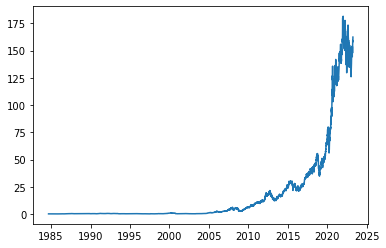

In [6]:
from sklearn import svm

aaple = pd.read_csv("AAPL.csv")

aaple['Date']= pd.to_datetime(aaple['Date'])
 
# Check the format of 'Date' column
aaple.info()


plt.plot(aaple['Date'], aaple['Open'])

In [7]:
aaple.index = aaple['Date']
aaple.head()
#aaple

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2023-03-31,2023-03-31,162.44,165.00,161.910,164.90,68749792.0
2023-03-30,2023-03-30,161.53,162.47,161.271,162.36,49501689.0
2023-03-29,2023-03-29,159.37,161.05,159.350,160.77,51305691.0
2023-03-28,2023-03-28,157.97,158.49,155.980,157.65,45992152.0
2023-03-27,2023-03-27,159.94,160.77,157.870,158.28,52390266.0


In [8]:
#aaple = aaple.drop(['Date'], axis=1)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-31,283.73,289.2700,283.0000,288.30,32765976.0
2023-03-30,284.23,284.4600,281.4800,284.05,25053410.0
2023-03-29,278.96,281.1398,278.4100,280.51,25087032.0
2023-03-28,275.79,276.1400,272.0451,275.23,21878647.0
2023-03-27,280.50,281.4589,275.5200,276.38,26840212.0


In [9]:
data.dropna(axis=1)

,Open,High,Low,Close
Date,,,,
2023-03-31,283.730000,289.270000,283.000000,288.300000
2023-03-30,284.230000,284.460000,281.480000,284.050000
2023-03-29,278.960000,281.139800,278.410000,280.510000
2023-03-28,275.790000,276.140000,272.045100,275.230000
2023-03-27,280.500000,281.458900,275.520000,276.380000
...,...,...,...,...
1986-03-19,0.070576,0.070576,0.070576,0.070576
1986-03-18,0.070576,0.070576,0.070576,0.070576
1986-03-17,0.070576,0.070576,0.070576,0.070576


In [23]:
data.sort_values(by='Date', ascending = True, inplace = True)


In [24]:
#predictor variables:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
  
# Store all predictor variables in a variable X
X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
1986-03-13,-0.007624,0.007624
1986-03-14,0.000000,0.000000
1986-03-17,0.000000,0.000000
1986-03-18,0.000000,0.000000
1986-03-19,0.000000,0.000000


In [25]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
print(y)

[0 0 0 ... 1 1 0]


In [26]:
# split the data into train and test
percentage = 0.8
split = int(percentage*len(data))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [27]:
cls = SVC().fit(X_train, y_train)

In [28]:
data['Predicted_Signal'] = cls.predict(X)

In [29]:
# Calculate daily returns
data['Return'] = data.Close.pct_change()

In [30]:
# Calculate strategy returns
data['Strategy_Return'] = data.Return *data.Predicted_Signal.shift(1)

In [31]:
# Calculate Cumulutive returns
data['Cum_Ret'] = data['Return'].cumsum()
data

,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,
1986-03-13,0.062951,0.070576,0.062951,0.070576,1.463519e+09,-0.007624,0.007624,0,NaN,NaN,NaN,48.106433
1986-03-14,0.070576,0.070576,0.070576,0.070576,4.371029e+08,0.000000,0.000000,0,0.000000,0.00000,0.000000,48.106433
1986-03-17,0.070576,0.070576,0.070576,0.070576,1.888938e+08,0.000000,0.000000,0,0.000000,0.00000,0.000000,48.106433
1986-03-18,0.070576,0.070576,0.070576,0.070576,9.612180e+07,0.000000,0.000000,0,0.000000,0.00000,0.000000,48.106433
1986-03-19,0.070576,0.070576,0.070576,0.070576,6.793478e+07,0.000000,0.000000,0,0.000000,0.00000,0.000000,48.106433
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,280.500000,281.458900,275.520000,276.380000,2.684021e+07,4.120000,5.938900,0,-0.014934,-0.00000,10.628260,0.004178
2023-03-28,275.790000,276.140000,272.045100,275.230000,2.187865e+07,0.560000,4.094900,0,-0.004161,-0.00000,10.624099,0.000000
2023-03-29,278.960000,281.139800,278.410000,280.510000,2.508703e+07,-1.550000,2.729800,1,0.019184,0.00000,10.643283,0.000000


In [32]:
# Plot Strategy Cumulative returns 
data['Cum_Strategy'] = data['Strategy_Return'].cumsum()
data

,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,
1986-03-13,0.062951,0.070576,0.062951,0.070576,1.463519e+09,-0.007624,0.007624,0,NaN,NaN,NaN,NaN
1986-03-14,0.070576,0.070576,0.070576,0.070576,4.371029e+08,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000
1986-03-17,0.070576,0.070576,0.070576,0.070576,1.888938e+08,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000
1986-03-18,0.070576,0.070576,0.070576,0.070576,9.612180e+07,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000
1986-03-19,0.070576,0.070576,0.070576,0.070576,6.793478e+07,0.000000,0.000000,0,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,280.500000,281.458900,275.520000,276.380000,2.684021e+07,4.120000,5.938900,0,-0.014934,-0.00000,10.628260,4.710363
2023-03-28,275.790000,276.140000,272.045100,275.230000,2.187865e+07,0.560000,4.094900,0,-0.004161,-0.00000,10.624099,4.710363
2023-03-29,278.960000,281.139800,278.410000,280.510000,2.508703e+07,-1.550000,2.729800,1,0.019184,0.00000,10.643283,4.710363


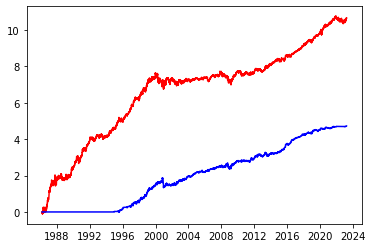

In [33]:
plt.plot(data['Cum_Ret'],color='red')
plt.plot(data['Cum_Strategy'],color='blue')

In [35]:
data.head()

,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,
1986-03-13,0.062951,0.070576,0.062951,0.070576,1.463519e+09,-0.007624,0.007624,0,NaN,NaN,NaN,NaN
1986-03-14,0.070576,0.070576,0.070576,0.070576,4.371029e+08,0.000000,0.000000,0,0.0,0.0,0.0,0.0
1986-03-17,0.070576,0.070576,0.070576,0.070576,1.888938e+08,0.000000,0.000000,0,0.0,0.0,0.0,0.0
1986-03-18,0.070576,0.070576,0.070576,0.070576,9.612180e+07,0.000000,0.000000,0,0.0,0.0,0.0,0.0
1986-03-19,0.070576,0.070576,0.070576,0.070576,6.793478e+07,0.000000,0.000000,0,0.0,0.0,0.0,0.0


In [50]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = data

# Preprocess the data
df = df.dropna()
X = df[['Open', 'Close', 'High', 'Low']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the SVM model
clf = svm.SVR(kernel='linear', C=1, epsilon=0.1)
clf.fit(X_train, y_train)

# Validate the model
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#rmse
#r2
# Predict stock prices
#future_data = pd.read_csv('future_data.csv')
##X_future = future_data[['feature1', 'feature2', 'feature3']]
#y_future_pred = clf.predict(X_future)

0.9999996420948309

In [47]:
df['predict_x'] = clf.predict(X_test)


ValueError: Length of values (1867) does not match length of index (9335)

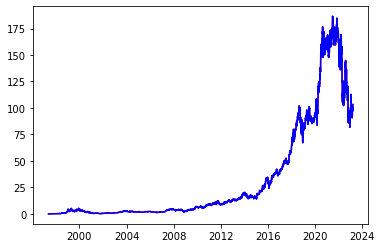

In [67]:
future_data = pd.read_csv("AMZN.csv")
future_data['Date'] = pd.to_datetime(future_data['Date'])
future_data.index = future_data['Date']
future_data = future_data.drop(['Date'], axis = 1)
#future_data = pd.read_csv('future_data.csv')
X_future = future_data[['Open', 'Close', 'High', 'Low']]
y_future_pred = clf.predict(X_future)

future_data.head()

future_data['y_future'] = y_future_pred


plt.plot(future_data['Close'], color='r')
plt.plot(future_data['y_future'], color = 'b')


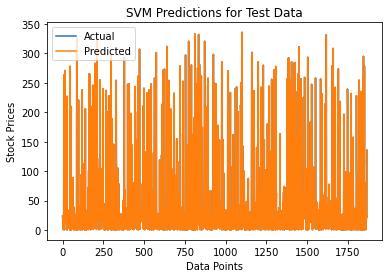

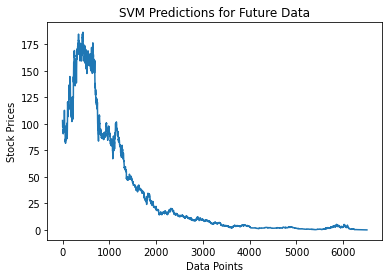

In [68]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('SVM Predictions for Test Data')
plt.xlabel('Data Points')
plt.ylabel('Stock Prices')
plt.show()

plt.plot(y_future_pred, label='Predicted')
plt.title('SVM Predictions for Future Data')
plt.xlabel('Data Points')
plt.ylabel('Stock Prices')
plt.show()

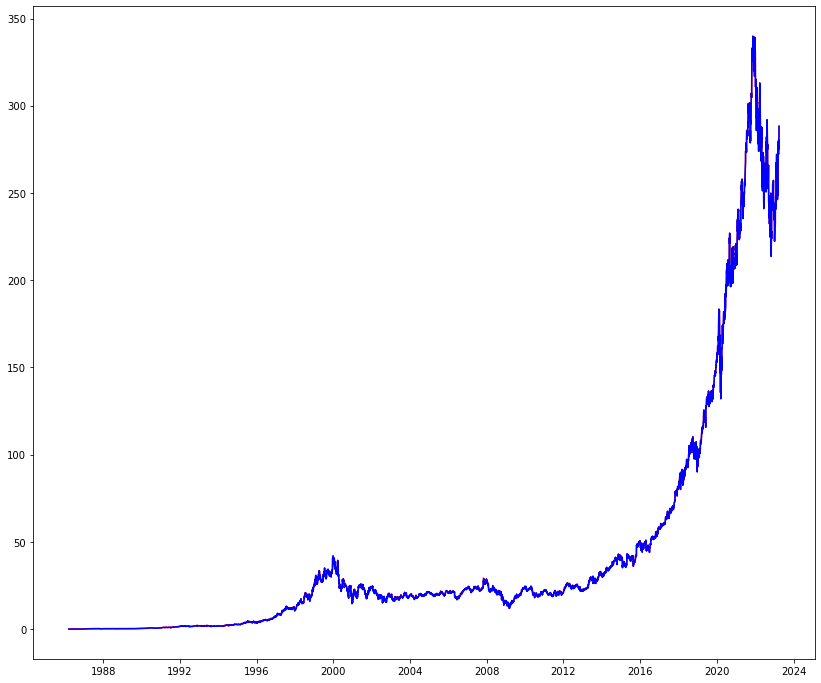

In [48]:
plt.figure(figsize = (14,12))

plt.plot(df['Close'],color='red')
plt.plot(df['predict_x'],color='blue')